Primeiramente, importar as bibliotecas

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [85]:
dados=pd.read_csv("googleplaystore.csv",encoding='utf-8')
dados_reviews=pd.read_csv("googleplaystore_user_reviews.csv",encoding='utf-8')

In [86]:
# Informações sobre a base lida do CSV
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [87]:
dados_reviews
dados_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


--------------
# Limpando e pre-processando os dados
--------------

#### Base de aplicativos

In [88]:
# Contagem de valores nulos
dados.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [89]:
# Percentual de valores nulos por coluna
(dados.isnull().sum()/dados.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [96]:
# calcula a média das notas por categora dos aplicativos
dados_temp = dados[pd.notnull(dados['Rating'])]
media_geral = np.mean(dados_temp['Rating'])
media_cat = dados_temp.groupby(['Category'])['Rating'].mean()
print("Média geral: ", media_geral, "\n\n Por", media_cat.sort_values(ascending=False))

Média geral:  4.193338315362448 

 Por Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.10

In [8]:
dados = dados[dados.Category != '1.9']
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


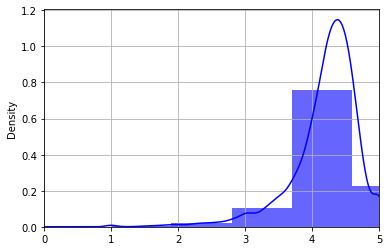

In [9]:
xt=dados_temp['Rating'].hist(bins=20, density=True, stacked=True, color='blue', alpha=0.6)
dados["Rating"].plot(kind='density', color='blue')

plt.grid()
plt.xlim(0.0,5.0)
plt.show()

In [10]:
# para suprirmir a falta de nota, preenche com a média
dados["Rating"] = dados.apply(lambda x: media_cat[x["Category"]] if pd.isnull(x['Rating']) else x['Rating'], axis=1)
dados.dropna(inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [11]:
# conta os valores duplicados da base
#dados['Duplicado']dados.duplicated(['App']).value_counts()
dados['Duplicado'] = dados.duplicated(['App'])
dados['Duplicado'].value_counts()

False    9648
True     1181
Name: Duplicado, dtype: int64

In [12]:
dados = dados[dados.Duplicado == False]
dados = dados.drop(['Duplicado'], axis='columns')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


#### Base de Reviews

In [13]:
dados_reviews.drop(['Sentiment', 'Translated_Review'], axis='columns', inplace=True)
dados_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Sentiment_Polarity      37432 non-null  float64
 2   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.5+ MB


In [14]:
dados_reviews.dropna(inplace=True)
dados_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Sentiment_Polarity      37432 non-null  float64
 2   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


## Transformação dos dados

In [15]:
dados['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [16]:
dados['Size'].value_counts()

Varies with device    1226
11M                    181
12M                    181
13M                    177
14M                    176
                      ... 
8.5k                     1
992k                     1
240k                     1
881k                     1
904k                     1
Name: Size, Length: 457, dtype: int64

In [17]:
# Faz a conversão de alguns campos para numérico
dados['Installs_int'] = dados['Installs'].apply(lambda x: int(x.replace("+","").replace(",","")))
dados['Reviews_int']=dados['Reviews'].apply(lambda x: int(x))
dados['Price_float']=dados['Price'].apply(lambda x: float(x.replace("$","")))
dados['Size_float']=dados['Size'].apply(lambda x: float(x.replace('M','e+6').replace('k','e+3').replace('Varies with device','0')))
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
 13  Installs_int    9648 non-null   int64  
 14  Reviews_int     9648 non-null   int64  
 15  Price_float     9648 non-null   float64
 16  Size_float      9648 non-null   float64
dtypes: float64(3), int64(2), object(

In [18]:
dados.describe()

Rating  Installs_int   Reviews_int  Price_float    Size_float
count  9648.00000  9.648000e+03  9.648000e+03  9648.000000  9.648000e+03
mean      4.17469  7.786211e+06  2.168369e+05     1.100193  1.781989e+07
std       0.49573  5.378830e+07  1.832349e+06    16.861727  2.150200e+07
min       1.00000  0.000000e+00  0.000000e+00     0.000000  0.000000e+00
25%       4.00000  1.000000e+03  2.500000e+01     0.000000  2.900000e+06
50%       4.20000  1.000000e+05  9.690000e+02     0.000000  9.200000e+06
75%       4.50000  1.000000e+06  2.944925e+04     0.000000  2.500000e+07
max       5.00000  1.000000e+09  7.815831e+07   400.000000  1.000000e+08

In [19]:
dados['Price_float'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [78]:
# Verifica, por curiosidade, valores aplicativos com preço maior que 100 USD.
#dados_temp = dados[["App", "Category", "Price_float", "Rating", "Installs"]]
#dados_temp[dados_temp['Price_float'] > 100].head()
dados[["App", "Category", "Price_float", "Rating", "Installs"]][dados['Price_float'] > 100].sort_values(by='Price_float', ascending=False).head()

App   Category  Price_float  Rating Installs
3467  I'm Rich - Trump Edition  LIFESTYLE       400.00     3.6  10,000+
3325    most expensive app (H)     FAMILY       399.99     4.3     100+
4398                I am Rich!    FINANCE       399.99     3.8   1,000+
4413        I AM RICH PRO PLUS    FINANCE       399.99     4.0   1,000+
4409                 I am Rich    FINANCE       399.99     4.3   5,000+

In [21]:
dados_reviews = dados_reviews.groupby('App').mean().sort_values(by='Sentiment_Polarity')
dados_reviews

Sentiment_Polarity  \
App                                                                     
Draw Your Game                                              -0.668490   
Google Street View                                          -0.500000   
DEER HUNTER 2018                                            -0.383333   
Fruit Block - Puzzle Legend                                 -0.183333   
Call of Duty:Black Ops Zombies                              -0.162120   
...                                                               ...   
Cameringo Lite. Filters Camera                               0.770269   
Bed Time Fan - White Noise Sleep Sounds                      0.781250   
Daily Workouts - Exercise Fitness Routine Trainer            0.800000   
Google Slides                                                0.933333   
HomeWork                                                     1.000000   

                                                   Sentiment_Subjectivity  
App                                                                        
Draw Your Game                                                   0.683333  
Google Street View                                               0.691667  
DEER HUNTER 2018                                                 0.433333  
Fruit Block - Puzzle Legend                                      0.377778  
Call of Duty:Black Ops Zombies                                   0.442716  
...                                                                   ...  
Cameringo Lite. Filters Camera                                   0.533333  
Bed Time Fan - White Noise Sleep Sounds                          0.600000  
Daily Workouts - Exercise Fitness Routine Trainer                0.750000  
Google Slides                                                    0.916667  
HomeWork                                                         0.300000  

[865 rows x 2 columns]

In [22]:
dados = dados.merge(dados_reviews, on='App', how='left')
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9648 non-null   object 
 1   Category                9648 non-null   object 
 2   Rating                  9648 non-null   float64
 3   Reviews                 9648 non-null   object 
 4   Size                    9648 non-null   object 
 5   Installs                9648 non-null   object 
 6   Type                    9648 non-null   object 
 7   Price                   9648 non-null   object 
 8   Content Rating          9648 non-null   object 
 9   Genres                  9648 non-null   object 
 10  Last Updated            9648 non-null   object 
 11  Current Ver             9648 non-null   object 
 12  Android Ver             9648 non-null   object 
 13  Installs_int            9648 non-null   int64  
 14  Reviews_int             9648 non-null   

In [23]:
media_sp=np.mean(dados_reviews['Sentiment_Polarity'])
media_ss=np.mean(dados_reviews['Sentiment_Subjectivity'])
media_sp, media_ss

(0.20017809513137053, 0.4898137587666908)

In [24]:
dados['Sentiment_Polarity'].fillna(media_sp,inplace=True)
dados['Sentiment_Subjectivity'].fillna(media_ss,inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9648 non-null   object 
 1   Category                9648 non-null   object 
 2   Rating                  9648 non-null   float64
 3   Reviews                 9648 non-null   object 
 4   Size                    9648 non-null   object 
 5   Installs                9648 non-null   object 
 6   Type                    9648 non-null   object 
 7   Price                   9648 non-null   object 
 8   Content Rating          9648 non-null   object 
 9   Genres                  9648 non-null   object 
 10  Last Updated            9648 non-null   object 
 11  Current Ver             9648 non-null   object 
 12  Android Ver             9648 non-null   object 
 13  Installs_int            9648 non-null   int64  
 14  Reviews_int             9648 non-null   

--------------
# Navegação e Visualização dos Dados
--------------

Text(0, 0.5, 'Qtd Apps')

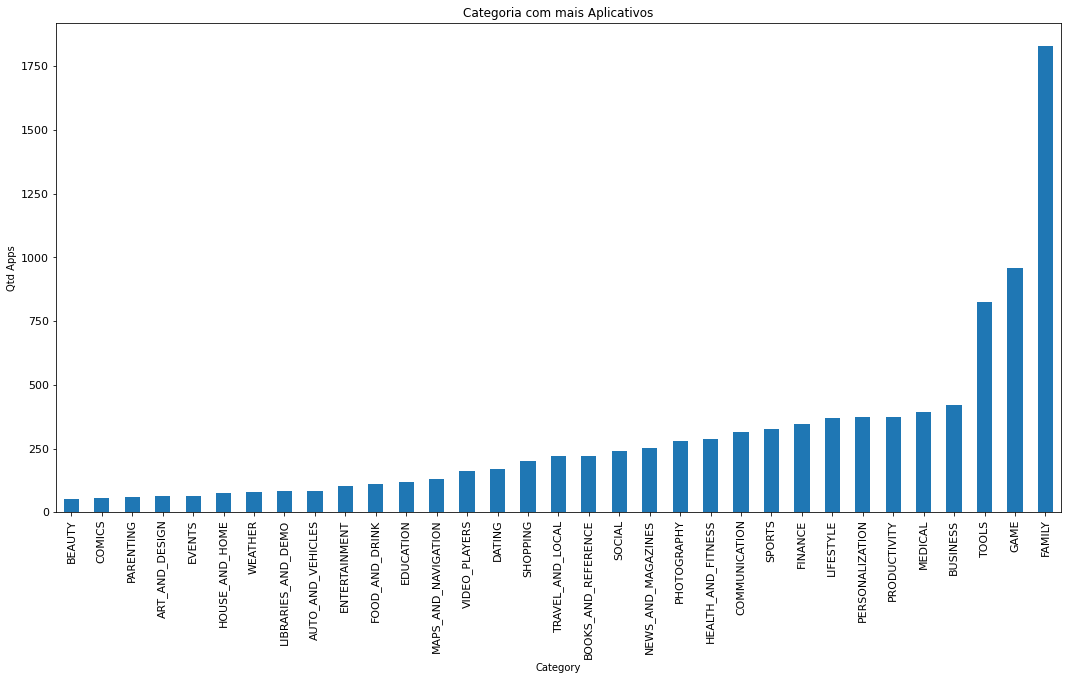

In [25]:
figura1 = plt.figure(figsize=(18,9)) 
dados.groupby('Category').count()["App"].sort_values().plot(kind='bar',title='Categoria com mais Aplicativos', fontsize=11)
plt.ylabel('Qtd Apps')

Text(0, 0.5, 'Qtd de Instalações')

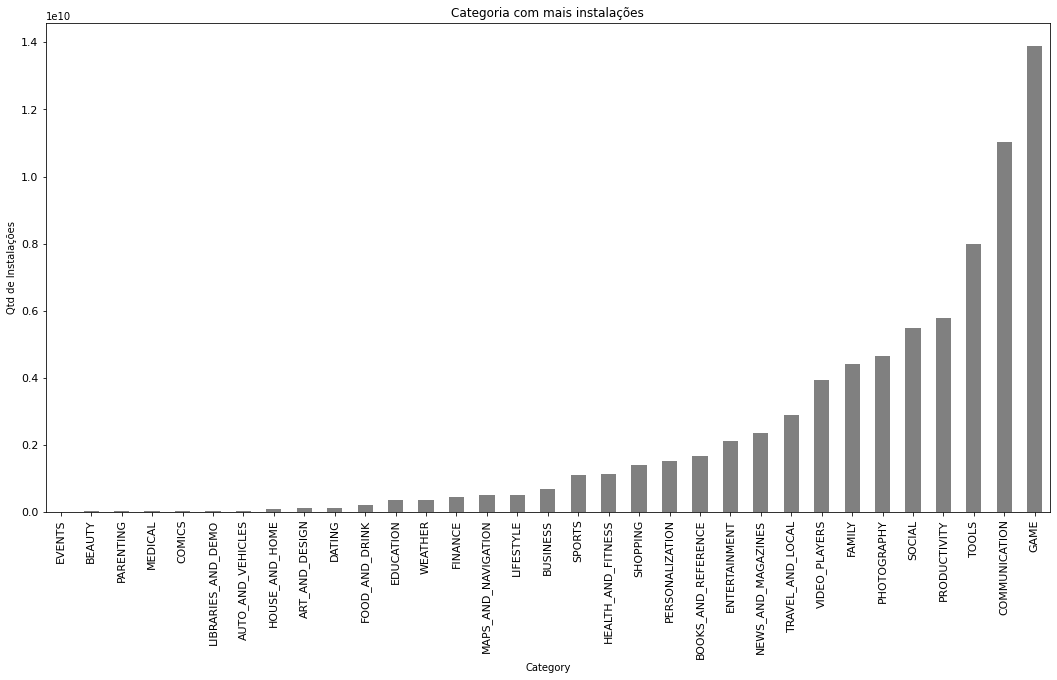

In [26]:
figura2 = plt.figure(figsize=(18,9)) 
dados.groupby('Category').sum().sort_values(by='Installs_int')['Installs_int'].plot(kind='bar',title='Categoria com mais instalações', fontsize=11, color='grey')
plt.ylabel('Qtd de Instalações') 

Text(0, 0.5, 'Qtd de Reviews')

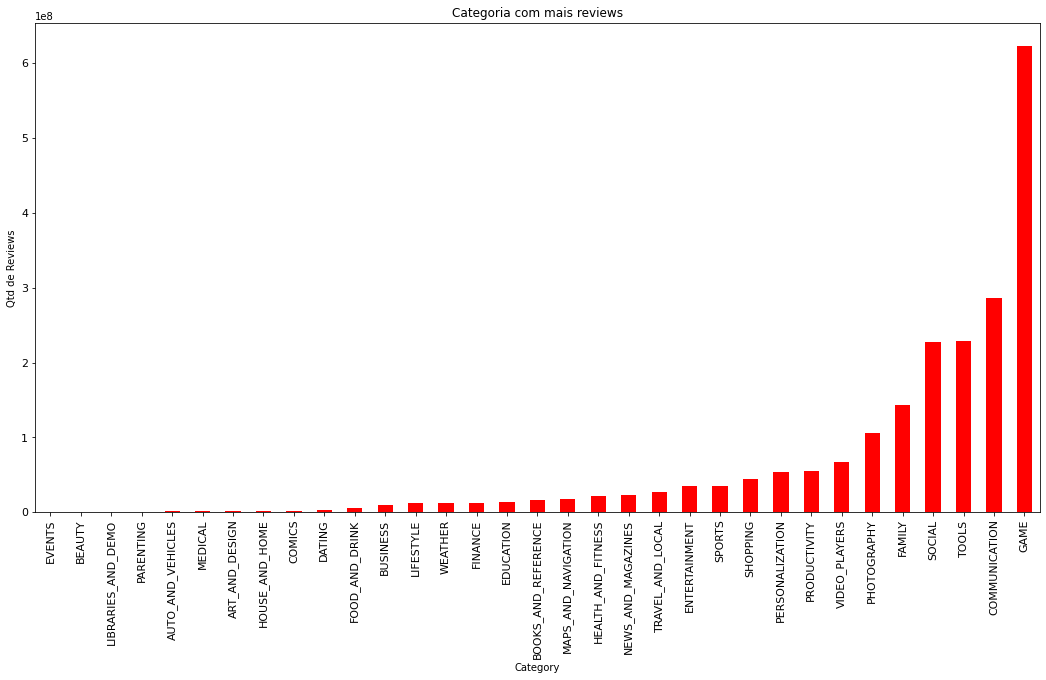

In [27]:
figura3 = plt.figure(figsize=(18,9)) 
dados.groupby('Category').sum().sort_values(by='Reviews_int')['Reviews_int'].plot(kind='bar',title='Categoria com mais reviews', fontsize=11, color='red')
plt.ylabel('Qtd de Reviews') 

Text(0, 0.5, 'Rating')

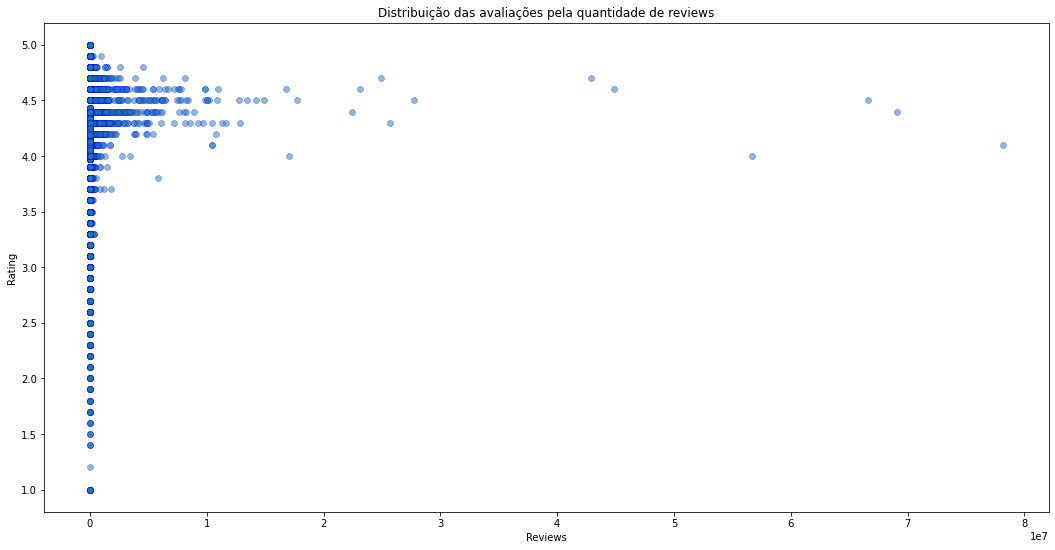

In [28]:
figura4 = plt.figure(figsize=(18,9)) 
plt.scatter(dados['Reviews_int'],dados['Rating'],edgecolor='blue',linewidth=0.5,alpha=0.50)
plt.title('Distribuição das avaliações pela quantidade de reviews')
plt.xlabel('Reviews')
plt.ylabel('Rating')

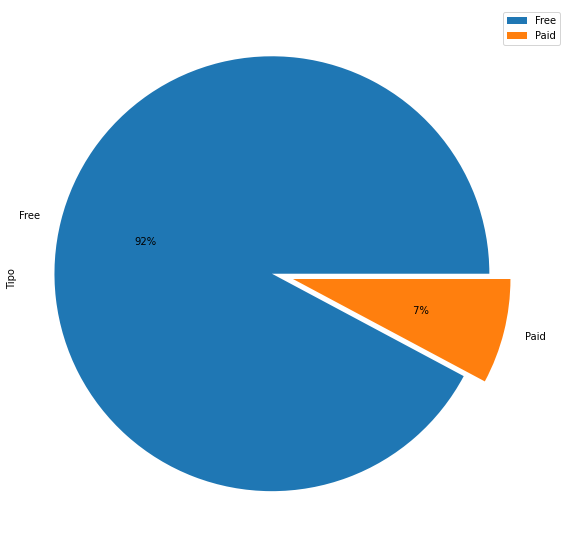

In [29]:
figura5 = plt.figure(figsize=(10,10))
explode=[0.1,0]
dados['Type'].value_counts().plot(kind='pie',autopct="%2i%%",explode=explode)
plt.ylabel('Tipo')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


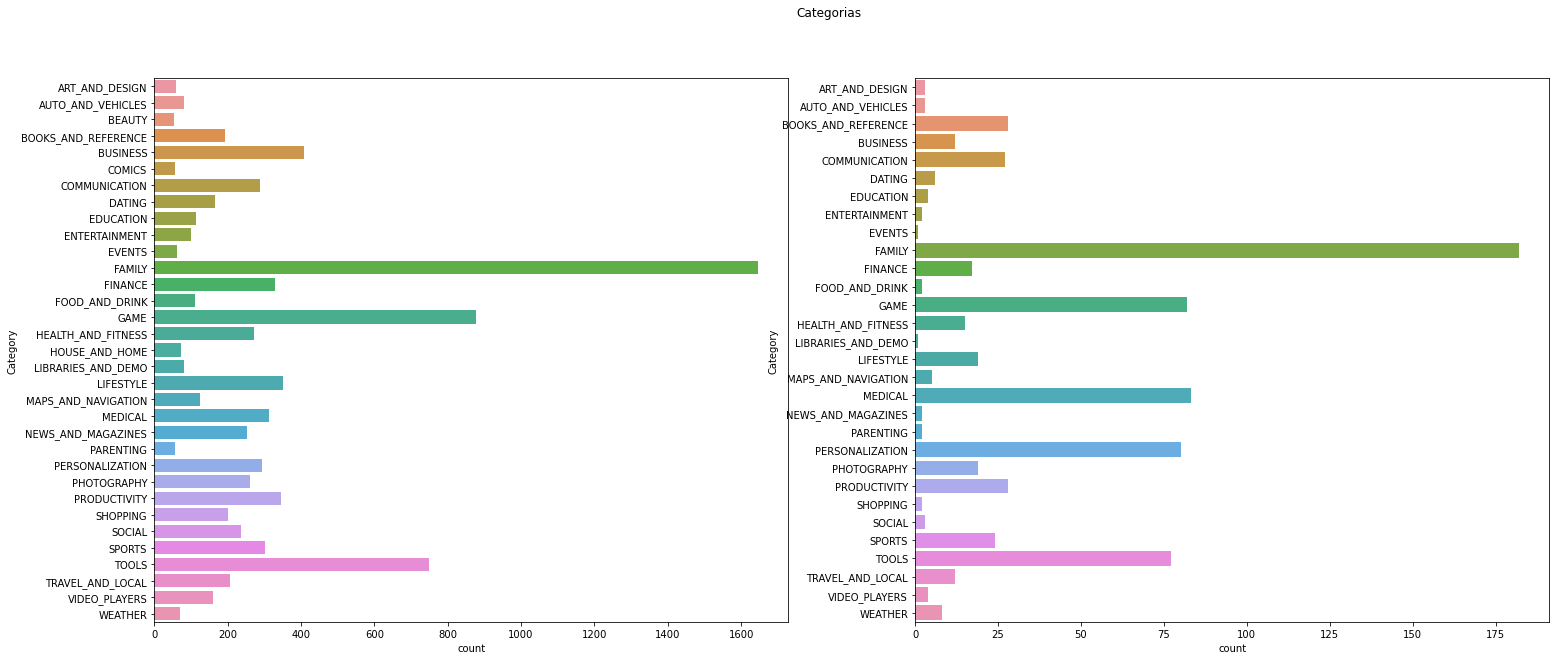

In [30]:
dados_temp = dados.sort_values(['Category'])
figura6,(graf1,graf2)=plt.subplots(1,2,figsize=(25,10))
plt.suptitle('Categorias')
sns.countplot(y='Category',data=dados_temp[dados['Type'] == 'Free'],ax=graf1)
sns.countplot(y='Category',data=dados_temp[dados['Type'] == 'Paid'],ax=graf2)
plt.show()

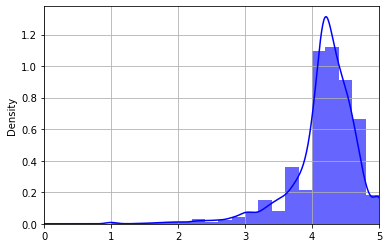

In [31]:
xt=dados[dados['Type'] == 'Free']['Rating'].hist(bins=20, density=True, stacked=True, color='blue', alpha=0.6)
dados["Rating"].plot(kind='density', color='blue')

plt.grid()
plt.xlim(0.0,5.0)
plt.show()

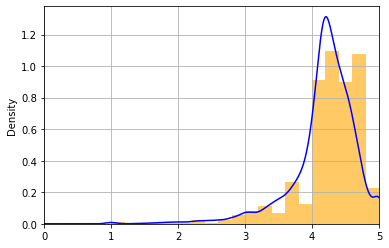

In [32]:
xt=dados[dados['Type'] == 'Paid']['Rating'].hist(bins=20, density=True, stacked=True, color='Orange', alpha=0.6)
dados["Rating"].plot(kind='density', color='blue')

plt.grid()
plt.xlim(0.0,5.0)
plt.show()

Text(0, 0.5, 'Preço em dólar')

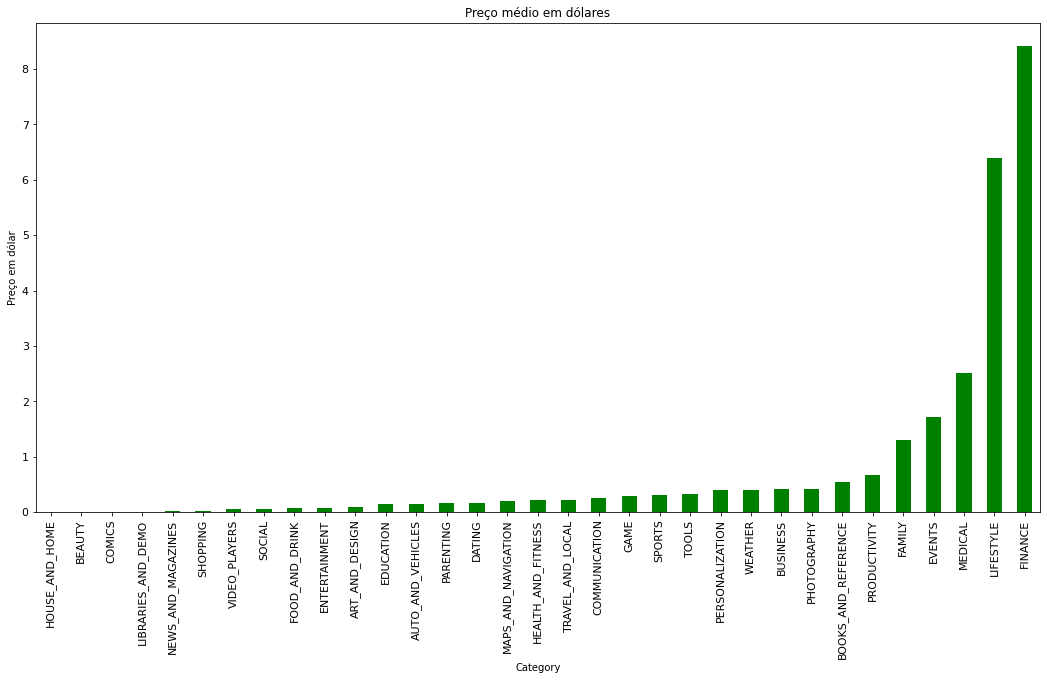

In [33]:
figura7 = plt.figure(figsize=(18,9)) 
dados.groupby('Category').mean().sort_values(by='Price_float')['Price_float'].plot(kind='bar',title='Preço médio em dólares', fontsize=11, color='green')
plt.ylabel('Preço em dólar') 

In [34]:
dados["Faturamento"] = dados["Installs_int"] * dados["Price_float"]
dados[dados['Faturamento'] > 0]['Faturamento'].describe()

count    7.430000e+02
mean     3.917866e+05
std      3.122119e+06
min      9.900000e-01
25%      3.009500e+02
50%      4.990000e+03
75%      5.740000e+04
max      6.990000e+07
Name: Faturamento, dtype: float64

Text(0, 0.5, 'Rating')

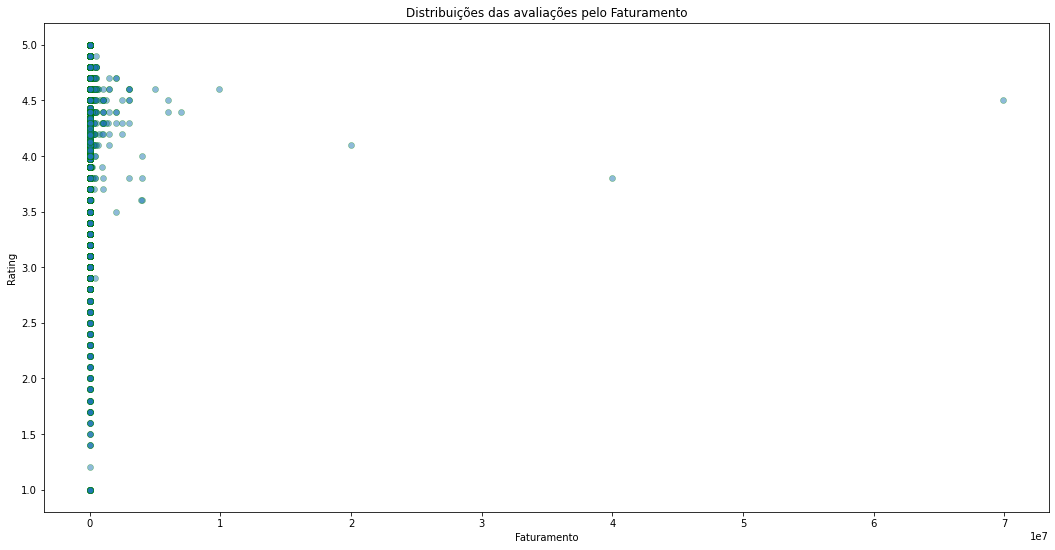

In [35]:
figura8 = plt.figure(figsize=(18,9)) 
plt.scatter(dados['Faturamento'],dados['Rating'],edgecolor='green',linewidth=0.5,alpha=0.50)
plt.title('Distribuições das avaliações pelo Faturamento')
plt.xlabel('Faturamento')
plt.ylabel('Rating')

In [36]:
dados_temp = dados.sort_values(['Faturamento'],ascending = 0 )[:10]
dados_temp.head()

App   Category  Rating  Reviews  \
1741                      Minecraft     FAMILY     4.5  2376564   
4392                      I am rich  LIFESTYLE     3.8     3547   
4396              I Am Rich Premium    FINANCE     4.1     1867   
3206                  Hitman Sniper       GAME     4.6   408292   
6362  Grand Theft Auto: San Andreas       GAME     4.4   348962   

                    Size     Installs  Type    Price Content Rating  \
1741  Varies with device  10,000,000+  Paid    $6.99   Everyone 10+   
4392                1.8M     100,000+  Paid  $399.99       Everyone   
4396                4.7M      50,000+  Paid  $399.99       Everyone   
3206                 29M  10,000,000+  Paid    $0.99     Mature 17+   
6362                 26M   1,000,000+  Paid    $6.99     Mature 17+   

                         Genres       Last Updated Current Ver  \
1741  Arcade;Action & Adventure      July 24, 2018     1.5.2.1   
4392                  Lifestyle   January 12, 2018         2.0   
4396                    Finance  November 12, 2017         1.6   
3206                     Action      July 12, 2018  1.7.110758   
6362                     Action     March 21, 2015        1.08   

             Android Ver  Installs_int  Reviews_int  Price_float  Size_float  \
1741  Varies with device      10000000      2376564         6.99         0.0   
4392        4.0.3 and up        100000         3547       399.99   1800000.0   
4396          4.0 and up         50000         1867       399.99   4700000.0   
3206          4.1 and up      10000000       408292         0.99  29000000.0   
6362          3.0 and up       1000000       348962         6.99  26000000.0   

      Sentiment_Polarity  Sentiment_Subjectivity  Faturamento  
1741            0.200178                0.489814   69900000.0  
4392            0.200178                0.489814   39999000.0  
4396            0.200178                0.489814   19999500.0  
3206            0.200178                0.489814    9900000.0  
6362            0.200178                0.489814    6990000.0

Text(0.5, 1.0, 'Aplicativos que mais faturaram')

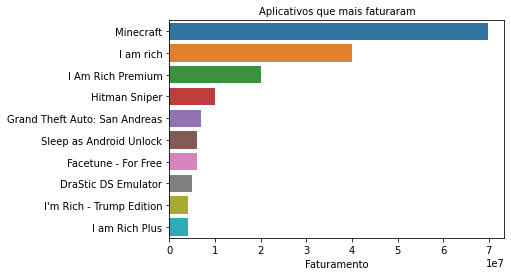

In [37]:
ax = sns.barplot(x = 'Faturamento' , y = 'App' , data = dados_temp )
ax.set_xlabel('Faturamento')
ax.set_ylabel('')
ax.set_title("Aplicativos que mais faturaram", size = 10)

--------------
# Aprendizado de máquina - Predição
--------------

In [38]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9647
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     9648 non-null   object 
 1   Category                9648 non-null   object 
 2   Rating                  9648 non-null   float64
 3   Reviews                 9648 non-null   object 
 4   Size                    9648 non-null   object 
 5   Installs                9648 non-null   object 
 6   Type                    9648 non-null   object 
 7   Price                   9648 non-null   object 
 8   Content Rating          9648 non-null   object 
 9   Genres                  9648 non-null   object 
 10  Last Updated            9648 non-null   object 
 11  Current Ver             9648 non-null   object 
 12  Android Ver             9648 non-null   object 
 13  Installs_int            9648 non-null   int64  
 14  Reviews_int             9648 non-null   

In [39]:
dados.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  Installs_int  Reviews_int  Price_float  Size_float  \
0  4.0.3 and up         10000          159          0.0  19000000.0   
1  4.0.3 and up        500000          967          0.0  14000000.0   
2  4.0.3 and up       5000000        87510          0.0   8700000.0   
3    4.2 and up      50000000       215644          0.0  25000000.0   
4    4.4 and up        100000          967          0.0   2800000.0   

   Sentiment_Polarity  Sentiment_Subjectivity  Faturamento  
0            0.200178                0.489814          0.0  
1            0.152652                0.641540          0.0  
2            0.200178                0.489814          0.0  
3            0.200178                0.489814          0.0  
4            0.200178                0.489814          0.0

## Prevendo a avaliação ('rating') 

In [40]:
dados_modelo_x=dados[['Category','Reviews_int','Size_float','Installs_int','Type','Price_float','Content Rating','Genres']]
dados_modelo_y=dados[['Rating']]
dados_modelo_x.head()

Category  Reviews_int  Size_float  Installs_int  Type  Price_float  \
0  ART_AND_DESIGN          159  19000000.0         10000  Free          0.0   
1  ART_AND_DESIGN          967  14000000.0        500000  Free          0.0   
2  ART_AND_DESIGN        87510   8700000.0       5000000  Free          0.0   
3  ART_AND_DESIGN       215644  25000000.0      50000000  Free          0.0   
4  ART_AND_DESIGN          967   2800000.0        100000  Free          0.0   

  Content Rating                     Genres  
0       Everyone               Art & Design  
1       Everyone  Art & Design;Pretend Play  
2       Everyone               Art & Design  
3           Teen               Art & Design  
4       Everyone    Art & Design;Creativity

In [41]:
#dados_modelo_x_tab = pd.get_dummies(dados_modelo_x, columns=['Category',"Content Rating","Type","Genres"])
#dados_modelo_x_tab.shape
#from sklearn.preprocessing import LabelEncoder
#le_category = LabelEncoder()
#le_content_rating = LabelEncoder()
#le_type = LabelEncoder()
#le_genres = LabelEncoder()
#dados_modelo_x_tab = dados_modelo_x
#dados_modelo_x_tab = dados_modelo_x_tab.assign(Category = le_category.fit_transform(dados_modelo_x['Category']))
#dados_modelo_x_tab = dados_modelo_x_tab.assign(Content_Rating = le_content_rating.fit_transform(dados_modelo_x['Content Rating']))
#dados_modelo_x_tab = dados_modelo_x_tab.assign(Type = le_type.fit_transform(dados_modelo_x['Type']))
#dados_modelo_x_tab = dados_modelo_x_tab.assign(Genres = le_genres.fit_transform(dados_modelo_x['Genres']))
#dados_modelo_x_tab = dados_modelo_x_tab.drop('Content Rating', axis = 1)
#dados_modelo_x_tab'Content Rating_enc'] = le_content_rating.fit_transform(dados_modelo_x['Content Rating'])
#dados_modelo_x['Type_enc'] = le_type.fit_transform(dados_modelo_x['Type'])
#dados_modelo_x['Genres_enc'] = le_genres.fit_transform(dados_modelo_x['Genres'])
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', dtype = int)
enc_df = pd.DataFrame(enc.fit_transform(dados_modelo_x[['Category',"Content Rating","Type","Genres"]]).toarray())
dados_modelo_x_tab = dados_modelo_x.reset_index()
dados_modelo_x_tab = dados_modelo_x_tab.join(enc_df)
dados_modelo_x_tab = dados_modelo_x_tab.drop(['index','Category',"Content Rating","Type","Genres"], axis='columns')
dados_modelo_x_tab.shape

(9648, 163)

In [42]:
dados_modelo_x_tab.head()

Reviews_int  Size_float  Installs_int  Price_float  0  1  2  3  4  5  ...  \
0          159  19000000.0         10000          0.0  1  0  0  0  0  0  ...   
1          967  14000000.0        500000          0.0  1  0  0  0  0  0  ...   
2        87510   8700000.0       5000000          0.0  1  0  0  0  0  0  ...   
3       215644  25000000.0      50000000          0.0  1  0  0  0  0  0  ...   
4          967   2800000.0        100000          0.0  1  0  0  0  0  0  ...   

   149  150  151  152  153  154  155  156  157  158  
0    0    0    0    0    0    0    0    0    0    0  
1    0    0    0    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0    0    0    0  
3    0    0    0    0    0    0    0    0    0    0  
4    0    0    0    0    0    0    0    0    0    0  

[5 rows x 163 columns]

### Regressão Linear

In [43]:
dados_modelo_y = np.ravel(dados_modelo_y)
x_train,x_test,y_train,y_test=train_test_split(dados_modelo_x_tab,dados_modelo_y,test_size=0.3,random_state=40)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6753, 163), (2895, 163), (6753,), (2895,))

In [44]:
from sklearn.linear_model import LinearRegression
regr_linear=LinearRegression()

regr_linear.fit(x_train,y_train)
y_prev = regr_linear.predict(x_test)

In [45]:
regr_linear.score(x_train,y_train)

0.049828339209698425

In [46]:
regr_linear.score(x_test,y_test)

0.035671675252474166

In [47]:
regr_linear.score(x_test,y_prev)

1.0

In [48]:
metrics.mean_absolute_error(y_test, y_prev, multioutput='raw_values')
print('intercept:', regr_linear.intercept_)
print('slope:', regr_linear.coef_)

intercept: 4.303960225254631
slope: [ 1.24634908e-08  1.19032086e-10  1.49513789e-10 -5.10451503e-04
  3.49660949e-01  1.36808066e-02  1.92820607e-02  4.73299569e-02
 -6.54718283e-02  1.83112133e-01 -7.08943499e-02 -1.59896941e-01
  8.60362800e-02  3.71793851e-02  9.81469602e-02 -1.68026822e-02
 -6.43897495e-02 -6.02457603e-02  1.73240272e-01  2.32274556e-02
 -3.75293220e-02 -2.34769104e-03 -7.29496442e-02 -9.52088721e-02
 -2.87253824e-02 -5.57127172e-02 -5.45305546e-02  4.47461168e-02
 -2.65057954e-02 -2.28745447e-02  5.23317343e-03 -1.06739652e-02
 -1.45449137e-01  2.62675780e-02 -9.67770057e-02 -1.49559013e-02
 -5.20128464e-03  5.55552637e-02 -4.29276694e-02 -4.42502362e-02
 -1.01115630e-02 -1.02458142e-02  5.19800194e-02 -3.86805364e-02
  3.86805353e-02 -2.08279580e-01  8.74604810e-02 -2.80639908e-01
  9.84781410e-03  3.17547429e-01 -3.26470379e-10 -1.44259113e-01
  1.79655511e-01  2.83174834e-01 -2.37658133e-01 -2.14797396e-01
 -3.05652151e-01 -8.88994572e-11  1.36808061e-02  1.92

Text(0, 0.5, 'Resíduos')

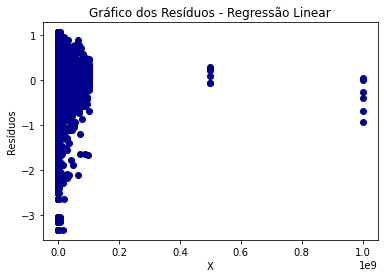

In [49]:
residuals = y_test-y_prev
plt.plot(x_test,residuals, 'o', color='darkblue')
plt.title("Gráfico dos Resíduos - Regressão Linear")
plt.xlabel("X")
plt.ylabel("Resíduos")

### Árvore de Decisão - Regressão

In [50]:
#label = dados.Rating
x_train,x_test,y_train,y_test=train_test_split(dados_modelo_x_tab,dados_modelo_y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6753, 163), (2895, 163), (6753,), (2895,))

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtree_regr=DecisionTreeRegressor(splitter='random', random_state=40)
dtree_regr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=40, splitter='random')

In [52]:
y_prev = dtree_regr.predict(x_test)

In [53]:
dtree_regr.score(x_train,y_train)

0.9981355126357426

In [54]:
dtree_regr.score(x_test,y_test)

-0.6618927016232103

Text(0, 0.5, 'Resíduos')

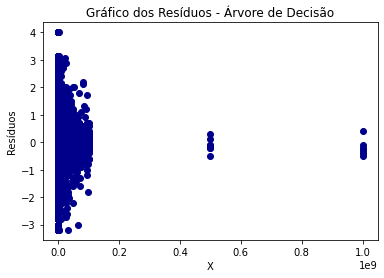

In [55]:
residuos = y_test-y_prev
plt.plot(x_test,residuos, 'o', color='darkblue')
plt.title("Gráfico dos Resíduos - Árvore de Decisão")
plt.xlabel("X")
plt.ylabel("Resíduos")

In [56]:
novo_app = {'Category' : ['GAME'],
           'Reviews_int' : [20000],
           'Size_float' : [60000000.0],
           'Installs_int' : [100000],
           'Type' : ['Free'],
           'Price_float' : [0.0],
           'Content Rating' : ['Everyone'],
           'Genres' : ['Sports']
          }
novo_df = pd.DataFrame(novo_app, columns = ['Category','Reviews_int','Size_float','Installs_int','Type','Price_float','Content Rating','Genres'])

enc_df = pd.DataFrame(enc.transform(novo_df[['Category',"Content Rating","Type","Genres"]]).toarray())
novo_df = novo_df.join(enc_df)
novo_df = novo_df.drop(['Category',"Content Rating","Type","Genres"], axis='columns')
print ("Por Regressão Linear: ", regr_linear.predict(novo_df))
print ("Por Árvore de Decisão: ", dtree_regr.predict(novo_df))

Por Regressão Linear:  [4.53290483]
Por Árvore de Decisão:  [4.2]


## Prevendo o número de instalações de aplicativos

In [57]:
dados_modelo_x=dados[['Category','Reviews_int','Size_float','Type','Price_float','Content Rating','Genres', 'Rating', 'Sentiment_Polarity', 'Sentiment_Subjectivity']]
dados_modelo_y=dados[['Installs_int']]
dados_modelo_x.head()

Category  Reviews_int  Size_float  Type  Price_float Content Rating  \
0  ART_AND_DESIGN          159  19000000.0  Free          0.0       Everyone   
1  ART_AND_DESIGN          967  14000000.0  Free          0.0       Everyone   
2  ART_AND_DESIGN        87510   8700000.0  Free          0.0       Everyone   
3  ART_AND_DESIGN       215644  25000000.0  Free          0.0           Teen   
4  ART_AND_DESIGN          967   2800000.0  Free          0.0       Everyone   

                      Genres  Rating  Sentiment_Polarity  \
0               Art & Design     4.1            0.200178   
1  Art & Design;Pretend Play     3.9            0.152652   
2               Art & Design     4.7            0.200178   
3               Art & Design     4.5            0.200178   
4    Art & Design;Creativity     4.3            0.200178   

   Sentiment_Subjectivity  
0                0.489814  
1                0.641540  
2                0.489814  
3                0.489814  
4                0.489814

In [58]:
# Transforma vetor com 1 coluna para array unidimensional, sugestão do LogisticRegression
dados_modelo_y = np.ravel(dados_modelo_y)

In [59]:
#dados_modelo_x_tab = pd.get_dummies(dados_modelo_x, columns=['Category',"Content Rating","Genres"])
#dados_modelo_x_tab.shape
enc_df = pd.DataFrame(enc.transform(dados_modelo_x[['Category',"Content Rating","Type","Genres"]]).toarray())
dados_modelo_x_tab = dados_modelo_x.reset_index()
dados_modelo_x_tab = dados_modelo_x_tab.join(enc_df)
dados_modelo_x_tab = dados_modelo_x_tab.drop(['index','Category',"Content Rating","Type","Genres"], axis='columns')
dados_modelo_x_tab.shape

(9648, 165)

In [60]:
sc=StandardScaler()
dados_modelo_x_tab=sc.fit_transform(dados_modelo_x_tab)
dados_modelo_x_tab.shape

(9648, 165)

### Regressão Logística

In [61]:
x_train,x_test,y_train,y_test=train_test_split(dados_modelo_x_tab,dados_modelo_y,test_size=0.1,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8683, 165), (965, 165), (8683,), (965,))

In [62]:
from sklearn.linear_model import LogisticRegression
regr_log=LogisticRegression(max_iter=450)
regr_log.fit(x_train,y_train)

LogisticRegression(max_iter=450)

In [63]:
y_prev = regr_log.predict(x_test)
regr_log.score(x_train,y_train)

0.28411839226073937

In [64]:
metrics.accuracy_score(y_prev, y_test)

0.23316062176165803

In [65]:
regr_log.score(x_test,y_test)

0.23316062176165803

In [66]:
print(metrics.classification_report(y_test, y_prev, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00         4
           5       1.00      0.00      0.00        10
          10       0.00      0.00      0.00        42
          50       1.00      0.00      0.00        32
         100       0.10      0.16      0.13        55
         500       1.00      0.00      0.00        33
        1000       0.21      0.23      0.22        98
        5000       0.00      0.00      0.00        47
       10000       0.24      0.26      0.25       113
       50000       0.00      0.00      0.00        48
      100000       0.14      0.15      0.14       104
      500000       0.00      0.00      0.00        44
     1000000       0.21      0.62      0.31       136
     5000000       0.00      0.00      0.00        62
    10000000       0.60      0.57      0.59        91
    50000000       1.00      0.08      0.15        24
   100000000       0.62    

In [67]:
matriz_conf = metrics.confusion_matrix(y_test, y_prev)
matriz_conf_tab = pd.DataFrame(data=matriz_conf, index=['0','1','5','10','50','100','500','1k','5k','10k','50k','100k','500k','1M','5M','10M','50M','100M','500M','1B'], columns=['0_p','1_p','5_p','10_p','50_p','100_p','500_p','1k_p','5k_p','10k_p','50k_p','100k_p','500k_p','1M_p','5M_p','10M_p','50M_p','100M_p','500M_p','1B_p'])
print(matriz_conf_tab)

      0_p  1_p  5_p  10_p  50_p  100_p  500_p  1k_p  5k_p  10k_p  50k_p  \
0       0    0    0     0     0      0      0     1     0      0      0   
1       0    0    0     0     0      0      0     0     0      1      0   
5       0    0    0     0     0      2      0     4     0      0      0   
10      0    0    0     0     0      7      0     5     0      4      0   
50      0    0    0     0     0     10      0     7     0      1      0   
100     0    0    0     1     0      9      0     8     0      6      0   
500     0    0    0     0     0      5      0     4     0      5      0   
1k      0    0    0     2     0     13      0    23     1     16      0   
5k      0    0    0     0     0      4      0    11     0      9      0   
10k     0    0    0     0     0      8      0    17     1     29      0   
50k     0    0    0     0     0      3      0     6     0      9      0   
100k    0    0    0     0     0      7      0     9     0     20      0   
500k    0    0    0     0

### Árvore de Decisão - Classificação

In [68]:
x_train,x_test,y_train,y_test=train_test_split(dados_modelo_x_tab,dados_modelo_y,test_size=0.1,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8683, 165), (965, 165), (8683,), (965,))

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree_classif=DecisionTreeClassifier(random_state=0, criterion='gini')
dtree_classif.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [70]:
y_prev = dtree_classif.predict(x_test)
metrics.accuracy_score(y_prev, y_test)

0.44974093264248705

In [71]:
print(metrics.classification_report(y_test, y_prev, zero_division = 1))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.14      0.25      0.18         4
           5       0.00      0.00      0.00        10
          10       0.43      0.36      0.39        42
          50       0.38      0.16      0.22        32
         100       0.34      0.47      0.39        55
         500       0.12      0.12      0.12        33
        1000       0.47      0.48      0.47        98
        5000       0.35      0.36      0.35        47
       10000       0.50      0.50      0.50       113
       50000       0.29      0.31      0.30        48
      100000       0.56      0.53      0.54       104
      500000       0.38      0.43      0.40        44
     1000000       0.60      0.58      0.59       136
     5000000       0.41      0.42      0.42        62
    10000000       0.59      0.56      0.58        91
    50000000       0.32      0.33      0.33        24
   100000000       0.44    

In [72]:
matriz_conf2 = metrics.confusion_matrix(y_test, y_prev)
matriz_conf_tab2 = pd.DataFrame(data=matriz_conf2, index=['0','1','5','10','50','100','500','1k','5k','10k','50k','100k','500k','1M','5M','10M','50M','100M','500M','1B'], columns=['0_p','1_p','5_p','10_p','50_p','100_p','500_p','1k_p','5k_p','10k_p','50k_p','100k_p','500k_p','1M_p','5M_p','10M_p','50M_p','100M_p','500M_p','1B_p'])
print(matriz_conf_tab2)

      0_p  1_p  5_p  10_p  50_p  100_p  500_p  1k_p  5k_p  10k_p  50k_p  \
0       1    1    0     0     0      0      0     0     0      0      0   
1       0    1    0     1     0      2      0     0     0      0      0   
5       2    1    0     5     1      1      0     0     0      0      0   
10      1    1    2    15     5     12      2     4     0      0      0   
50      0    2    2     6     5     14      2     1     0      0      0   
100     0    1    3     6     2     26     10     6     1      0      0   
500     0    0    0     1     0      8      4    17     1      2      0   
1k      0    0    0     1     0     12     11    47    14     12      0   
5k      0    0    0     0     0      2      2    11    17     14      1   
10k     0    0    0     0     0      0      2    14    16     57     13   
50k     0    0    0     0     0      0      0     0     0     20     15   
100k    0    0    0     0     0      0      0     0     0      8     21   
500k    0    0    0     0

In [73]:
novo_app = {'Category' : ['GAME'],
           'Reviews_int' : [500],
           'Size_float' : [60000000.0],          
           'Type' : ['Paid'],
           'Price_float' : [2.99],           
           'Content Rating' : ['Everyone'],
           'Genres' : ['Sports'],
           'Rating' : [4.2],
           'Sentiment_Polarity' : [media_sp],
           'Sentiment_Subjectivity' : [media_ss]
          }
novo_df = pd.DataFrame(novo_app, columns = ['Category','Reviews_int','Size_float','Type','Price_float','Content Rating','Genres','Rating','Sentiment_Polarity','Sentiment_Subjectivity'])

enc_df = pd.DataFrame(enc.transform(novo_df[['Category','Content Rating','Type','Genres']]).toarray())
novo_df = novo_df.join(enc_df)
novo_df = novo_df.drop(['Category','Content Rating', 'Type','Genres'], axis='columns')
print ("Por Regressão Logística: ", regr_log.predict(novo_df))
print ("Por Árvore de Decisão: ", dtree_classif.predict(novo_df))

Por Regressão Logística:  [1000000]
Por Árvore de Decisão:  [100000000]


In [74]:
#!pip install pydotplus
from sklearn import tree
import pydotplus 
from PIL import Image

dot_data = tree.export_graphviz(dtree_classif, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                class_names=['0','1','5','10','50','100','500','1k','5k','10k','50k','100k','500k','1M','5M','10M','50M','100M','500M','1B'])

graph = pydotplus.graph_from_dot_data(dot_data)  
graph.create_png()
graph.write_png("dtree.png");

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.105943 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.105943 to fit

